#Multiplication Project

---

By Danh Ho & Aidan Hsu

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

Since our early years in first grade, we have been immersed in the fundamental operations of mathematics including multiplication. As we progressed through our academic journey, the scope of our multiplication skills expanded to encompass longer integers. The conventional method involved multiplying each digit of the first input number by every digit of the second input number and subsequently summing up these products. While this technique has been a reliable foundation, it's worth noting that more efficient algorithms exist for calculating the product of two numbers.

---

This jupyter notebook explores two alternative multiplication algorithms: the Karatsuba Algorithm and the Toom-Cook Algorithm, and compares them with the standard multiplication algorithm.

###Visualizing the Standard Algorithm and Karatsuba Algorithm in Python

Python actually implements the Karatsuba algorithm natively when computing the product of two large numbers. The code below multiples two increasingly large numbers and creates a graph of the runtime required for the operation.

In [ ]:
python_time = []
digits = 100000
iterations = 10
for i in range(1,digits+1,1000):
  avg = 0
  for j in range(iterations):
    X = random.randint(10**(i-1), 10**i)
    Y = random.randint(10**(i-1), 10**i)
    # print(X,Y)
    start = time.time()
    X*Y
    end = time.time()
    # print(end-start)
    avg += end-start
  python_time.append(avg/iterations)

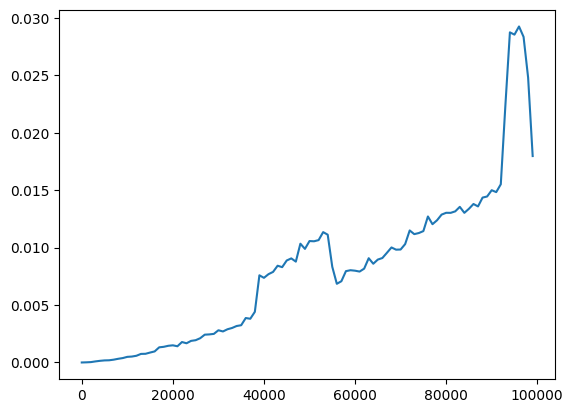

In [ ]:
plt.plot(range(1,digits+1,1000),python_time)

It can be seem in the graph above that, when the digits of X and Y reach around 40000, the trend of the graph drastically changes.

To better visualize this, the following graph plots $log($digits$)$ vs. $log($time$)$.

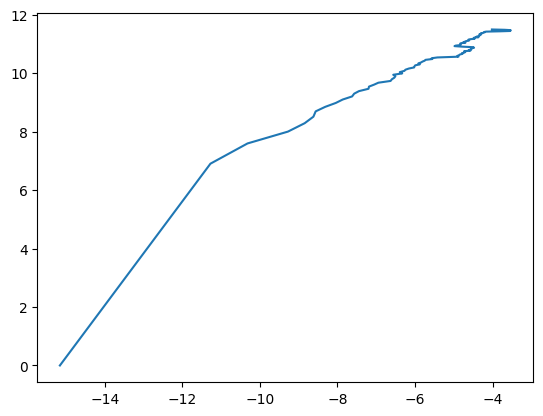

In [ ]:
plt.plot(pl.log(python_time),pl.log(range(1,digits+1,1000)))

The drastic change in slope implies a change in exponent, or in other words, a change in the degree of the polynomial.

###Explanation and Runtime analysis of Karatsuba Algorithm

The Karatsuba Algorithm is a divide and conquer algorithm.

Let our input be $X, Y$, of $N$ length.

Ex. $X = 12, Y = 34$

---

The standard multiplication algorithm performs 4 multiplications, as shown below.

\begin{array}{cccc}
  & 1 & 2\\
 *& 3& 4\\
 \hline
 &1*4&2*4 \\
 1*3&2*3 \\
 \hline
 1*3&1*4+2*3&2*4
\end{array}

---

However, the karatsuba algorithm only requres 3 multiplication steps.

Firstly, X and Y are divided into two halves.

$a = 1, b = 2, c=3, d=4$

Then, we compute $a+b$ and $c+d$.

The three multiplication operations are the following:

$ a * c $

$ b * d $

$ (a+b) * (c+d) $

And lastly we subtract $ a * c $ and $ b * d$ from $ (a+b) * (c+d) $.

The calculation is shown below.

\begin{array}{cccc}
  & 1 & \rightarrow & (1+2) & \leftarrow& 2\\
 *& 3 & \rightarrow & (3+4) & \leftarrow& 4\\
 \hline
 &1*3&&(1+2)(3+4) &&2*4 \\
 -&&&1*3-2*4 \\
 \hline
&1*3&&1*4+2*3&&2*4 \\
\end{array}

---

It can be seen that both algorithms reach the same answer. This is due to the distributive properties of (a+b)(c+d). $$(a+b)(c+d)-ac-bd$$ $$=(ac + ad+ bc + bd) - ac - bd$$ $$=ad + bc$$

---

The standard multiplication algorithm has a time complexity of $O(n^2)$, as each $n$ digit of $X$ must be multipled by each $n$ digit of $Y$.

The Karatsuba algorithm on the other hand, has two componenets that determine its time complexity.

As the Karatsuba algorithm involves recursion, its runtime can be represented with a recurrence relation.

The first component would be the three recurring operations of length $n/2$, yielding an expression of $3T(n/2)$.

The second component is the addition and subtraction operations needed in the Karatsuba Algorithm. As both operations can be performed in linear time, the resulting expression would be $O(N)$.

Therefore we are left with an expression of $T(n) = 3T(n/2) + O(n)$. If we apply the master theorem to this expression, we get a time complexitiy of $O(n^{log_23}) = O(n^{1.585})$.





### Generate X and Y

In [ ]:
import random

digits = 10
X = random.randint(10**(digits-1), 10**digits)
Y = random.randint(10**(digits-1), 10**digits)

print("X:",X," Y:",Y)

X: 6783153514  Y: 1877546644


###Implementations in Python

####Karatsuba Algorithm

In [ ]:
def karatsubatest(x, y):
    # Base case
    if x < 10 or y < 10:
        return x * y

    # Calculate midpoint of both numbers
    half = max(len(str(x)), len(str(y))) // 2

    # Splitting the numbers
    a = x // (10 ** half)
    b = x % (10 ** half)
    c = y // (10 ** half)
    d = y % (10 ** half)

    # Recursively calculate
    ac = karatsubatest(a, c)
    bd = karatsubatest(b, d)
    abcd = karatsubatest(a + b, c + d)

    abcd -= ac + bd
    # Combine results
    return ac * 10 ** (2 * half) +  abcd * 10 ** half + bd

print("Expected Ans   :", X*Y)
print("Karatsuba Ans  :", karatsubatest(X,Y))

Expected Ans   : 12735687115947507016
Karatsuba Ans  : 12735687115947507016


####Standard Algorithm

In [ ]:
def product(X,Y):
  return int(X)*int(Y)

def standardtest(X,Y):
  ans = 0

  for Y_tens, i in enumerate(reversed(str(Y))):
    subans = 0
    carry = 0
    for X_tens, j in enumerate(reversed(str(X))):
      # product + any potential carry over from previous digit
      p = product(i,j) + carry

      #compute new carry and make sure p is one digit
      carry = p//10
      if carry != 0:
        p = int(str(p)[1:])

      #align p to correct tens place
      p *= 10 ** (X_tens)

      subans += p
    #account for possible extra carry from leftmost multiplication
    if carry != 0:
      subans += carry*10 ** (X_tens+1)

    subans *= 10 ** (Y_tens)
    ans += subans
  return ans

print("Expected Ans  :", X*Y)
print("Standard Ans  :", standardtest(X,Y))

Expected Ans  : 6
Standard Ans  : 6


####Comparing Karatsuba and Standard multiplication algorithm

While Karatsuba should perform faster than the standard multiplication algorithm with higher digits, this python implementation does not do it justice.

Even with

In [ ]:
import time
import matplotlib.pyplot as plt

standard_time = []
karatsuba_time = []

max_digits = 50
iterations = 50

for i in range(1,max_digits+1):

  s_avg = 0
  k_avg = 0
  for j in range(iterations):
    X = random.randint(10**(i-1), 10**i)
    Y = random.randint(10**(i-1), 10**i)

  #time standard
    start = time.time()
    expected_ans = standardtest(X,Y)
    end = time.time()
    s_avg += (end-start)
  #time karatsuba
    start = time.time()
    karatsuba_ans = karatsubatest(X,Y)
    end = time.time()
    k_avg += (end-start)

  standard_time.append(s_avg/iterations)
  karatsuba_time.append(k_avg/iterations)

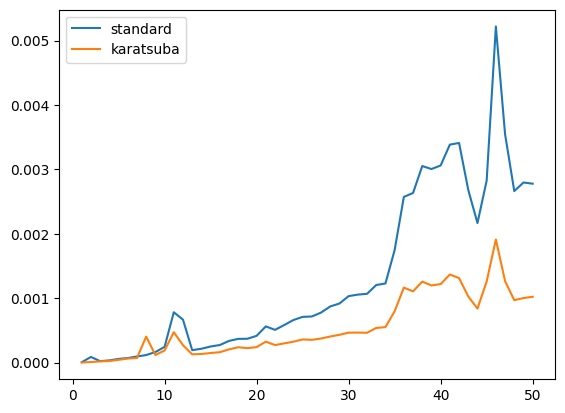

In [ ]:
plt.plot(range(1,max_digits+1), standard_time)
plt.plot(range(1,max_digits+1), karatsuba_time)
plt.legend(['standard', 'karatsuba'])

The result from the implementationmatch what was expected.

For smaller numbers, standard algorithm performs better, but after around 10 digits karatsuba algorithm runs faster.


###Toom Cook Algorithm

The Karatsuba algorithm split X and Y into two parts to recursively a product.

The Toom Cook algorithm is a generalization of the Karatsuba Algorithm. It splits X, Y into n parts, and the corresponding algorithm is called Toom-Cook $n$.

---

As shown above, naive multiplication algorithm has a time complexity of $O(n^2)$.

The Karatsuba algorithm, which is identical to the Toom-Cook 2 algorithm, has a time complexity of $O(n^{1.585})$.

The Toom-Cook 3 algorithm has a faster time complexity compared to the previous two of $O(n^{1.465})$. It splits the input numbers into three parts using a set of interpolation points.

---

Split each n-digit number into three parts:

$x = x_0 * B^{2} + x_1 * B + x_2$

$y = y_0 * B^{2} + y_1 * B + y_2$

,where $B$ stands for base. $B$ is selected in a way to separate the numbers somewhat evenly. $B = 10^m$, and one way $m$ can be chosen is by computing $⌊max(len(x),len(y))/3⌋$.

---

We then compute five products, namely:

$w_0 = x_0 * y_0$

$w_1 = (x_0 + x_1 + x_2) * (y_0 + y_1 + y_2)$

$w_2 = (x_0 - x_1 + x_2) * (y_0 - y_1 + y_2)$

$w_3 = (x_0 - 2x_1 + 4x_2) * (y_0 - 2y_1 + 4y_0)$

$w_4 = x_2 * y_2$

---

Combine the products using the following interpolation steps in order.

$c_0 = w_0$

$c_4 = w_4$

$c_3 = (w_3 - w_1) // 3$

$c_1 = (w_1 - w_2) // 2$

$c_2 = w_2 - w_0$

$c_3 = (c_2 - c_3)//2 + 2 * w_4$

$c_2 = c_2 + c_1 - c_4$

$c_1 = c_1 - c_3$

---

Compute the final result:

<!-- Result = $z_0 * B^{2m} + (z_1 - z_0 - z_2) * B^m + (z_2 - z_1 + z_3) * B^{m/2} + (z_3 - z_4) * B^{m/3} + z_4$ -->

Result = $c_0 + c_1 * B^1 + c_2 * B^2 + c_3 * B^3 + c_4 * B^4$

---

Toom-Cook generalizes Karatsuba by splitting the input numbers into more parts and using polynomial interpolation to combine the intermediate products efficiently. This approach can be extended to further reduce the number of recursive multiplications for even larger input sizes.

Toom-Cook 3 Runtime Complexity:
The Toom-Cook 3 algorithm splits the input numbers into three parts and performs five multiplications. Let's denote the size of the input numbers as n (assuming n is a multiple of 3 for simplicity).

Splitting the Numbers:
The splitting step takes O(n) time to split each input into three parts.
Multiplications:

There are five multiplications: z0, z1, z2, z3, and z4.
Each of these multiplications involves multiplying smaller-sized numbers.
The recursive calls for these multiplications occur with numbers of size n/3.
Therefore, the time complexity of the multiplications is T(n/3).
Combining the Results:

The combining step involves polynomial interpolation, which takes O(n) time.
Polynomial interpolation is done using a set of coefficients and interpolation points.

$T(n) = 5T(n/3) + O(n)$

Using the Master Theorem: $O(n^{log_3 5})$ = $O(n^{1.4645})$.

###Implementation of Toom Cook Algorithm - Toom-3

The code below is an implementation of the Toom Cook 3 algorithm.

In [ ]:
def toom_cook_3(X, Y):
    # Convert input to integers directly
    x = int(X)
    y = int(Y)

    # Base case
    if x < 100 or y < 100:
        return x * y

    # Figure out the number of digits
    n = max(len(str(x)), len(str(y)))
    third = n // 3

    # Splitting the numbers into three parts
    x0 = x % (10 ** third)
    x1 = (x // (10 ** third)) % (10 ** third)
    x2 = x // (10 ** (2 * third))

    y0 = y % (10 ** third)
    y1 = (y // (10 ** third)) % (10 ** third)
    y2 = y // (10 ** (2 * third))

    # Calculate intermediate values
    w0 = toom_cook_3(x0, y0)
    w1 = toom_cook_3((x2 + x1 + x0),(y2 + y1 + y0))
    w2 = toom_cook_3((x2 - x1 + x0),(y2 - y1 + y0))
    w3 = toom_cook_3((4 * x2 - 2 * x1 + x0),(4 * y2 - 2 * y1 + y0))
    w4 = toom_cook_3(x2, y2)

    # Calculate interpolation constants
    c0 = w0
    c4 = w4
    c3 = (w3 - w1) // 3
    c1 = (w1 - w2) // 2
    c2 = w2 - w0
    c3 = (c2 - c3)//2 + 2 * w4
    c2 = c2 + c1 - c4
    c1 = c1 - c3

    # Combine results using Toom-Cook 3 formulas
    result = (
        c4 * (10 ** (4 * third))
        + c3 * (10 ** (3 * third))
        + c2 * (10 ** (2 * third))
        + c1 * (10 ** third)
        + c0
    )
    return result

X	=	1234567890123456789012
Y	=	987654321987654321098
print("Expected Ans   :", X * Y)
print("Toom-Cook 3 Ans:", toom_cook_3(str(X), str(Y)))


Expected Ans   : 1219326312467611632493760095208585886175176
Toom-Cook 3 Ans: 1219326312467611632493760095208585886175176


#### Comparing Toom-3, Karatsuba Algorithm and Standard Algorithm

In [ ]:
import time
import matplotlib.pyplot as plt

standard_time = []
toom_time = []
karatsuba_time = []

max_digits = 50
iterations = 50

for i in range(1,max_digits+1):

  s_avg = 0
  t_avg = 0
  k_avg = 0
  for j in range(iterations):
    X = random.randint(10**(i-1), 10**i)
    Y = random.randint(10**(i-1), 10**i)

  #time standard
    start = time.time()
    expected_ans = standardtest(X,Y)
    end = time.time()
    s_avg += (end-start)
  #time toom
    start = time.time()
    expected_ans = toom_cook_3(X,Y)
    end = time.time()
    t_avg += (end-start)
  #time karatsuba
    start = time.time()
    karatsuba_ans = karatsubatest(X,Y)
    end = time.time()
    k_avg += (end-start)

  standard_time.append(s_avg/iterations)
  toom_time.append(t_avg/iterations)
  karatsuba_time.append(k_avg/iterations)

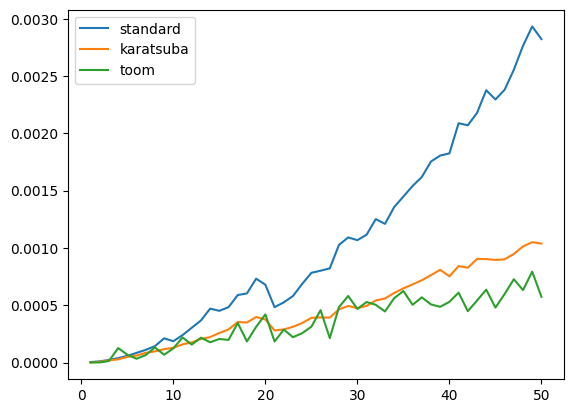

In [ ]:
plt.plot(range(1,max_digits+1), standard_time)
plt.plot(range(1,max_digits+1), karatsuba_time)
plt.plot(range(1,max_digits+1), toom_time)

plt.legend(['standard','karatsuba','toom'])

It can be seen that Toom Cook 3 Algorithm runs even faster asymptotically than the Karatsuba Algorithm. This is expected behavior, and any futher Toom Cook $n$ Algorithm, where $n > 3$ is expected to run even faster.

#Citations

Babai, Laszlo. “Algorithms { CMSC-272xx Divide and Conquer: The Karatsuba Algorithm.” Algorithms – CMSC-272XX Divide and Conquer: The Karatsuba Algorithm, 13 Jan. 2021, people.cs.uchicago.edu/~laci/HANDOUTS/karatsuba.pdf.

Bodrato, M., Zanoni, A.: Integer and Polynomial Multiplication: Towards Optimal Toom-Cook Matrices. Proceedings of the ISSAC 2007 Conference. ACM press, New York (2007)

Gupta, Rishika. “What Is the Karatsuba Multiplication Algorithm?” Medium, Python in Plain English, 22 June 2022, python.plainenglish.io/karatsuba-multiplication-65a2efcccfd9.

“Karatsuba Algorithm.” Wikipedia, Wikimedia Foundation, 15 Dec. 2023, en.wikipedia.org/wiki/Toom%E2%80%93Cook_multiplication https://en.wikipedia.org/wiki/Karatsuba_algorithm.

LambdaClass. (2023, January 2). Weird ways to multiply really fast with Karatsuba, toom–cook and Fourier. LambdaClass Blog. https://blog.lambdaclass.com/weird-ways-to-multiply-really-fast-with-karatsuba-toom-cook-and-fourier/

Larasati HT, Awaludin AM, Ji J, Kim H. Quantum Circuit Design of Toom 3-Way Multiplication. Applied Sciences. 2021; 11(9):3752. https://doi.org/10.3390/app11093752